In [1]:
import pandas as pd 
import os

label_data = pd.read_csv('data_yidong/Day8_0-54.txt')
# label_data = pd.read_csv('data_raw/Day35_0-199.txt')
score_data = pd.read_csv('score_statistics.csv', header=None, names=['name', 'score'])
print(label_data.shape)
print(score_data.shape)
score_data['label_raw'] = 0
print(score_data)

label_data_2 = pd.DataFrame(label_data)
print(label_data_2)
score_data['label'] = 0
print(score_data)

(1998, 3)
(1998, 2)
        name     score  label_raw
0   0_k0.csv  9.837433          0
1   0_k1.csv  9.951995          0
2  0_k10.csv  8.621369          0
3  0_k11.csv  7.212417          0
4  0_k12.csv  0.000000          0
(1998, 3)
(1998, 3)
        name     score  label_raw  label
0   0_k0.csv  9.837433          0      0
1   0_k1.csv  9.951995          0      0
2  0_k10.csv  8.621369          0      0
3  0_k11.csv  7.212417          0      0
4  0_k12.csv  0.000000          0      0


In [2]:
'''
    打标签后0是正常，1是异常
'''
for i in range(label_data.shape[0]):
    # if i >= 5:
    #     continue
    machine_id = label_data.machine_id.iloc[i]
    kpi_id = label_data.kpi_id.iloc[i]
    label = label_data.label.iloc[i]
    # print((machine_id, kpi_id, label))
    name = str(machine_id) + '_k' + str(kpi_id) + '.csv'
    # print(name)
    index = score_data[score_data.name == name].index.tolist()[0]
    #打标签
    score_data.loc[index, 'label_raw'] = 1 - label
    if (label == 0):
        print((name, score_data.loc[index, 'label_raw']))

for i in range(label_data_2.shape[0]):
    # if i >= 5:
    #     continue
    machine_id = label_data_2.machine_id.iloc[i]
    kpi_id = label_data_2.kpi_id.iloc[i]
    label = label_data_2.label.iloc[i]
    # print((machine_id, kpi_id, label))
    name = str(machine_id) + '_k' + str(kpi_id) + '.csv'
    # print(name)
    index = score_data[score_data.name == name].index.tolist()[0]
    #打标签
    if label == 2:
        score_data.loc[index, 'label'] = 2
    else:
        score_data.loc[index, 'label'] = 1 - label
    if (label == 0 or label == 2):
        print((name, score_data.loc[index, 'label']))

score_data.to_csv('./score_label.csv', index=None)

('0_k7.csv', 1)
('0_k32.csv', 1)
('0_k35.csv', 1)
('2_k22.csv', 1)
('5_k0.csv', 1)
('5_k1.csv', 1)
('5_k2.csv', 1)
('5_k7.csv', 1)
('5_k32.csv', 1)
('5_k35.csv', 1)
('6_k24.csv', 1)
('7_k6.csv', 1)
('7_k10.csv', 1)
('7_k11.csv', 1)
('7_k13.csv', 1)
('7_k15.csv', 1)
('7_k17.csv', 1)
('7_k33.csv', 1)
('7_k34.csv', 1)
('8_k22.csv', 1)
('8_k24.csv', 1)
('13_k36.csv', 1)
('14_k31.csv', 1)
('18_k4.csv', 1)
('18_k10.csv', 1)
('18_k12.csv', 1)
('18_k15.csv', 1)
('18_k16.csv', 1)
('18_k32.csv', 1)
('18_k35.csv', 1)
('19_k2.csv', 1)
('19_k7.csv', 1)
('19_k32.csv', 1)
('19_k35.csv', 1)
('22_k24.csv', 1)
('26_k2.csv', 1)
('26_k7.csv', 1)
('26_k14.csv', 1)
('26_k18.csv', 1)
('29_k0.csv', 1)
('29_k1.csv', 1)
('29_k2.csv', 1)
('29_k6.csv', 1)
('29_k7.csv', 1)
('29_k10.csv', 1)
('29_k11.csv', 1)
('29_k12.csv', 1)
('29_k13.csv', 1)
('29_k15.csv', 1)
('29_k16.csv', 1)
('29_k17.csv', 1)
('29_k24.csv', 1)
('29_k29.csv', 1)
('29_k31.csv', 1)
('29_k32.csv', 1)
('29_k33.csv', 1)
('29_k34.csv', 1)
('29_k35.cs

In [3]:
'''
    计算最佳score，保存pr和re；0是正常，1是异常
'''
from sklearn.metrics import precision_recall_curve, roc_curve, auc,roc_auc_score

evaluate_data = pd.read_csv('./score_label.csv')
score = evaluate_data['score'].tolist()
label = evaluate_data['label_raw'].tolist()

precision, recall, thresholds = precision_recall_curve(label, score, pos_label=1)
f1_record = 0
index = 0

for i in range(len(thresholds)):
    if precision[i] == 0 or recall[i] == 0:
        continue
    f1 = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
    if f1 > f1_record:
        f1_record = f1
        index = i
print("best threshold: ", thresholds[index])
print("best precision: ", precision[index])
print("best recall: ", recall[index])
print("best f1_score: ", f1_record)

#将个数对齐
print((len(precision), len(recall), len(thresholds)))
precision = precision[:-1]
recall = recall[:-1]
print((len(precision), len(recall), len(thresholds)))


pr_dict = {
    'precision': precision,
    'recall': recall,
    'thresholds': thresholds
}
pr_data = pd.DataFrame(pr_dict)
pr_data.to_csv('./pr_evaluate.csv')


best threshold:  6.407020175988446
best precision:  0.10714285714285714
best recall:  0.51
best f1_score:  0.17708333333333334
(1351, 1351, 1350)
(1350, 1350, 1350)


In [4]:
'''
    计算AUC,保存fpr和tpr；0是正常，1是异常
'''
fpr, tpr, th = roc_curve(label, score, pos_label=1)
auc_record = auc(fpr, tpr)
print('AUC: ', auc_record)

print((len(fpr), len(tpr), len(th)))

roc_dict = {
    'fpr': fpr,
    'tpr': tpr,
    'thresholds': th
}
roc_data = pd.DataFrame(roc_dict)
roc_data.to_csv('./roc_evaluate.csv')

AUC:  0.7272444678609062
(290, 290, 290)


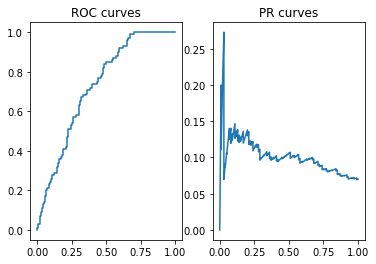

In [5]:
'''
    绘制ROC和PR曲线
'''
import matplotlib.pyplot as plt 

#ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr)
plt.title('ROC curves')

#PR
plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.title('PR curves')

plt.savefig(os.path.join('./images', 'curve.png'))
plt.show()
